## Collecting (mostly) Non-Depressive data from Multiple Sources

Here we try to get some neutral as well as emotional dat from the competition (SemEval-2018 Task 1: Affect in Tweets (AIT-2018))
(https://competitions.codalab.org/competitions/17751#learn_the_details)

There are various subtasks and datasets. We decided to use the one with annotated Emotional Intensity, which is of Gold standard. This will allow us to be more specific about the type and range of emotions to include in our dataset, and more confident of the depth of its emotional content since it has been professionally annotated.

This notebook shows our analytical process in making the decision for inclusion. We try to find distinguishable patterns for each category in order to draw generalisaton based on their intensity score.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/2024/Depression data/depression-detection")

## 1. Load Data

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
from textblob import TextBlob

In [6]:
%cd /content/drive/MyDrive/2024/Depression data/depression-detection/data

/content/drive/MyDrive/2024/Depression data/depression-detection/data


In [7]:
# fb_post1_bbc=pd.read_csv("/content/drive/MyDrive/2024/Depression data/interactive-facebook-reactions/data/bbcnews_facebook_statuses.csv")
fb_post1_cnn=pd.read_csv("/content/drive/MyDrive/2024/Depression data/interactive-facebook-reactions/data/cnn_facebook_statuses.csv")

In [11]:
# fb_post_df_full = pd.concat([fb_post1_bbc,fb_post1_cnn])

fb_post_df_full=fb_post1_cnn

In [12]:
fb_post_df_full.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,5550296508_10154953526846509,More than 150 music stars signed an open lette...,"Selena Gomez, Yoko Ono and Lady Gaga sign open...",link,http://cnn.it/28P2fhY,2016-06-23 09:20:01,56,10,1,49,6,0,1,0,1
1,5550296508_10154953465071509,JUST IN: At least 51 people have been killed a...,Tornado in China kills at least 51 people,link,http://cnn.it/28P2tpy,2016-06-23 09:01:35,652,86,142,325,3,119,4,200,1
2,5550296508_10154953390456509,✔️ Immigration \n✔️ Affirmative action\n✔️ Abo...,Supreme Court cases to watch,link,http://cnn.it/28SXnvZ,2016-06-23 08:38:43,285,52,53,274,4,4,1,1,1
3,5550296508_10154952135926509,"""We're talking about terrorism right now. This...",GOP congressman: 'This isn't about guns',link,http://cnn.it/28OQBnt,2016-06-23 07:32:31,1034,635,111,750,49,9,22,10,194
4,5550296508_10154952030666509,"20 hours and ticking, U.S. Democrats are still...",Democrats continue their sit-in on the House f...,video,https://www.facebook.com/cnn/videos/1015495203...,2016-06-23 06:50:46,11209,5727,1725,8506,1958,78,146,53,468


In [13]:
def preprocess_text(text):
    # Convert text to lowercase
    text=str(text)
    text = text.lower()
    # Remove special characters
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])
    return text

In [15]:
fb_post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         4644 non-null   object
 1   status_message    4633 non-null   object
 2   link_name         4485 non-null   object
 3   status_type       4644 non-null   object
 4   status_link       4643 non-null   object
 5   status_published  4644 non-null   object
 6   num_reactions     4644 non-null   int64 
 7   num_comments      4644 non-null   int64 
 8   num_shares        4644 non-null   int64 
 9   num_likes         4644 non-null   int64 
 10  num_loves         4644 non-null   int64 
 11  num_wows          4644 non-null   int64 
 12  num_hahas         4644 non-null   int64 
 13  num_sads          4644 non-null   int64 
 14  num_angrys        4644 non-null   int64 
dtypes: int64(9), object(6)
memory usage: 544.3+ KB


In [16]:
fb_post_df_full['status_message'] = fb_post_df_full['status_message'].apply(preprocess_text)

In [17]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    # Get polarity (sentiment score)
    polarity = blob.sentiment.polarity
    # Classify affect dimension based on polarity
    if polarity > 0:
        affect_dimension = 'joy'
    elif polarity < 0:
        affect_dimension = 'sadness'
    else:
        affect_dimension = 'neutral'
    return affect_dimension, polarity

In [18]:
fb_post_df_full['affect_dimension'], fb_post_df_full['intensity_score'] = zip(*fb_post_df_full['status_message'].apply(analyze_sentiment))

In [19]:
fb_post_df_full.affect_dimension.unique()

array(['joy', 'sadness', 'neutral'], dtype=object)

In [20]:
reformatted_data = fb_post_df_full[['status_id', 'status_message', 'affect_dimension', 'intensity_score']]
reformatted_data.columns = ['ID', 'Post_text', 'Affect Dimension', 'Intensity Score']

In [21]:
reformatted_data.shape

(4644, 4)

In [22]:
reformatted_data.to_csv('/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/data/fb_sentiment.csv', index=False)

In [23]:
pd.set_option('display.max_colwidth', 200)

In [24]:
reformatted_data[reformatted_data['Affect Dimension']=='joy'].shape

(2009, 4)

In [25]:
reformatted_data[reformatted_data['Affect Dimension']=='sadness'].shape

(943, 4)

In [26]:
reformatted_data[reformatted_data['Affect Dimension']=='neutral'].shape

(1692, 4)

In [27]:
fb_df_joy=reformatted_data[reformatted_data['Affect Dimension']=='joy'].reset_index(drop=True)
fb_df_sad=reformatted_data[reformatted_data['Affect Dimension']=='sadness'].reset_index(drop=True)
fb_df_neutral=reformatted_data[reformatted_data['Affect Dimension']=='neutral'].reset_index(drop=True)

In [28]:
reformatted_data.head()

,ID,Post_text,Affect Dimension,Intensity Score
0,5550296508_10154953526846509,more than 150 music stars signed an open letter to congress reading stop gun violence now,joy,0.250000
1,5550296508_10154953465071509,just in at least 51 people have been killed after a tornado accompanied by hailstorms thunderstorms and lightning hit eastern china china xinhua news reports,sadness,-0.250000
2,5550296508_10154953390456509,immigration \n affirmative action\n abortion access\n\nthe supreme court is preparing to release these muchanticipated decisions,joy,0.350000
3,5550296508_10154952135926509,were talking about terrorism right now this isnt about guns\n\ncongressman sean duffy rebuked house democrats who are staging a sitin for stricter gun control measures,joy,0.285714
4,5550296508_10154952030666509,20 hours and ticking us democrats are still protesting on the house floor for stricter gun control measures congressman mark takano is streaming the sitin live on facebook,joy,0.136364


In [29]:
fb_df_joy.head()

,ID,Post_text,Affect Dimension,Intensity Score
0,5550296508_10154953526846509,more than 150 music stars signed an open letter to congress reading stop gun violence now,joy,0.250000
1,5550296508_10154953390456509,immigration \n affirmative action\n abortion access\n\nthe supreme court is preparing to release these muchanticipated decisions,joy,0.350000
2,5550296508_10154952135926509,were talking about terrorism right now this isnt about guns\n\ncongressman sean duffy rebuked house democrats who are staging a sitin for stricter gun control measures,joy,0.285714
3,5550296508_10154952030666509,20 hours and ticking us democrats are still protesting on the house floor for stricter gun control measures congressman mark takano is streaming the sitin live on facebook,joy,0.136364
4,5550296508_10154951945601509,in one case a detroit clinic that was actually a front for a narcotics diversion scheme billed medicare for more than 36 million,joy,0.250000


In [30]:
fb_df_sad.head()

,ID,Post_text,Affect Dimension,Intensity Score
0,5550296508_10154953465071509,just in at least 51 people have been killed after a tornado accompanied by hailstorms thunderstorms and lightning hit eastern china china xinhua news reports,sadness,-0.250000
1,5550296508_10154952002266509,rep john lewis is sitting back down this time its to protest gun violence,sadness,-0.077778
2,5550296508_10154951838671509,nearly 7in10 voters say they think presumptive donald j trump should step down as chairman and president of the trump organization while running for president,sadness,-0.027778
3,5550296508_10154951533036509,the anger among voters in the tooclosetocall referendum bears similarities to the anger in the united states says stephen collinson of cnn politics,sadness,-0.700000
4,5550296508_10154951437651509,a new report claims thousands of people are being executed in china in secret and their organs harvested for use in transplant operations,sadness,-0.131818


In [31]:
fb_df_neutral.head()

,ID,Post_text,Affect Dimension,Intensity Score
0,5550296508_10154951625501509,the brexit referendum on thursday is the biggest decision brits have faced in a generation,neutral,0.0
1,5550296508_10154951359396509,just in polls open in a historic referendum on the united kingdoms future membership in the european union euref,neutral,0.0
2,5550296508_10154950958721509,a version of we shall overcome is sung on the house floor during democrats sitin over guns httpcnnit28o18z2,neutral,0.0
3,5550296508_10154950832921509,the pitch to voters is that were the people who say we want the government out of your pocketbook and out of your bedroom said gary johnsons running mate bill weld during the libertariantownhall h...,neutral,0.0
4,5550296508_10154950629061509,the year is 2016 and a third party is going to prime time heres what to look for as gary johnson and his running mate bill weld take the libertariantownhall stage,neutral,0.0


In [32]:
fb_df_joy

,ID,Post_text,Affect Dimension,Intensity Score
0,5550296508_10154953526846509,more than 150 music stars signed an open letter to congress reading stop gun violence now,joy,0.250000
1,5550296508_10154953390456509,immigration \n affirmative action\n abortion access\n\nthe supreme court is preparing to release these muchanticipated decisions,joy,0.350000
2,5550296508_10154952135926509,were talking about terrorism right now this isnt about guns\n\ncongressman sean duffy rebuked house democrats who are staging a sitin for stricter gun control measures,joy,0.285714
3,5550296508_10154952030666509,20 hours and ticking us democrats are still protesting on the house floor for stricter gun control measures congressman mark takano is streaming the sitin live on facebook,joy,0.136364
4,5550296508_10154951945601509,in one case a detroit clinic that was actually a front for a narcotics diversion scheme billed medicare for more than 36 million,joy,0.250000
...,...,...,...,...
2004,5550296508_10154494531031509,the case is part of a wider lawsuit brought by nearly 50 women against the company,joy,0.100000
2005,5550296508_10154494459586509,experts say its far too soon to know if theres any benefit to swabbing vaginal fluids on a newborn baby and there may be risks,joy,0.100000
2006,5550296508_10154494252641509,how true were the claims hillary clinton and bernie sanders made during the demtownhall\n\ncnns reality check team spent the night putting their statements and assertions to the test,joy,0.125000
2007,5550296508_10154494213371509,did you miss the demtownhall with hillary clinton and bernie sanders weve got you covered in 90 seconds more highlights httpcnnit1r0oozj,joy,0.500000


In [33]:
len(fb_df_joy), len(fb_df_sad), len(fb_df_neutral)

(2009, 943, 1692)

Text(0, 0.5, 'frequency')

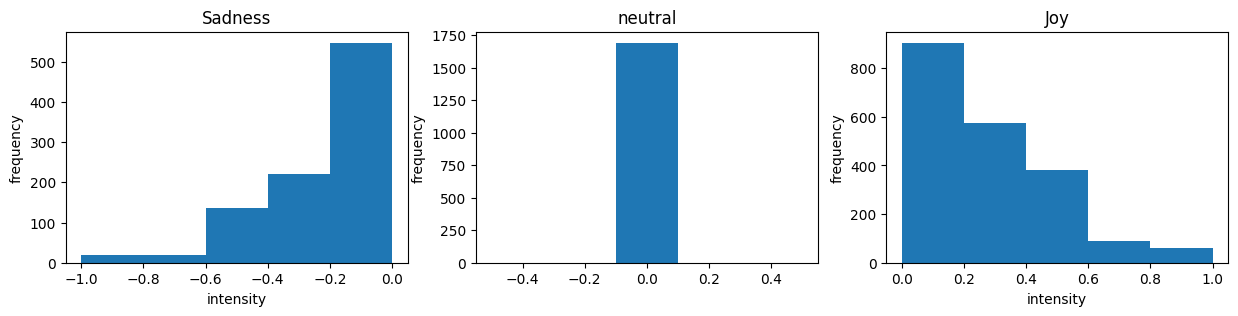

In [70]:
plt.figure(figsize=(15,3))

plt.subplot(1, 3, 1)
plt.hist(fb_df_sad["Intensity Score"], bins=5)
plt.title('Sadness')
plt.xlabel('intensity')
plt.ylabel('frequency')


plt.subplot(1, 3, 2)
plt.hist(fb_df_neutral["Intensity Score"], bins=5)
plt.title('neutral')
#plt.xlabel('intensity')
plt.ylabel('frequency')


plt.subplot(1, 3, 3)
plt.hist(fb_df_joy["Intensity Score"], bins=5)
plt.title('Joy')
plt.xlabel('intensity')
plt.ylabel('frequency')

In [35]:
fb_df_neutral["Intensity Score"].value_counts().sort_values(ascending=False).head()

Intensity Score
0.0    1692
Name: count, dtype: int64

## 4. Analysis of Individual Datasets

Let´s Try to look more closely at each category, especially at the lower and upper region, and decide if any data can be included into our training set.
We want to find generalisable patterns

**_A. Examine Sadness_**

In [36]:
fb_df_sad.head(10)

,ID,Post_text,Affect Dimension,Intensity Score
0,5550296508_10154953465071509,just in at least 51 people have been killed after a tornado accompanied by hailstorms thunderstorms and lightning hit eastern china china xinhua news reports,sadness,-0.250000
1,5550296508_10154952002266509,rep john lewis is sitting back down this time its to protest gun violence,sadness,-0.077778
2,5550296508_10154951838671509,nearly 7in10 voters say they think presumptive donald j trump should step down as chairman and president of the trump organization while running for president,sadness,-0.027778
3,5550296508_10154951533036509,the anger among voters in the tooclosetocall referendum bears similarities to the anger in the united states says stephen collinson of cnn politics,sadness,-0.700000
4,5550296508_10154951437651509,a new report claims thousands of people are being executed in china in secret and their organs harvested for use in transplant operations,sadness,-0.131818
5,5550296508_10154951082501509,a chinese student has been given a life sentence after being found guilty of murdering his girlfriend while they were both studying in iowa,sadness,-0.250000
6,5550296508_10154951058091509,two seriously ill patients have been flown from the south pole in a daring rescue mission,sadness,-0.500000
7,5550296508_10154951002721509,cold feet before a wedding very common a snake chomping on the grooms ankle not so much,sadness,-0.263333
8,5550296508_10154950891921509,no bill no break house democrats shouted down speaker paul ryan in a confrontational moment during their sitin over guns httpcnnit28rfzaw,sadness,-0.155556
9,5550296508_10154949670521509,they failed miserably in their job basically botched it didnt stop the water in flint from being poisoned,sadness,-0.750000


In [37]:
fb_df_sad.describe()

,Intensity Score
count,9.430000e+02
mean,-2.174954e-01
std,1.985005e-01
min,-1.000000e+00
25%,-3.000000e-01
50%,-1.555556e-01
75%,-8.333333e-02
max,-1.850372e-17


In [44]:
fb_df_sad[fb_df_sad["Intensity Score"] <=-0.1].head(10)
fb_df_sad[fb_df_sad["Intensity Score"] <=-0.1].shape

(674, 4)

In [45]:
fb_df_sad[fb_df_sad["Intensity Score"] <=-0.1].head()

,ID,Post_text,Affect Dimension,Intensity Score
0,5550296508_10154953465071509,just in at least 51 people have been killed after a tornado accompanied by hailstorms thunderstorms and lightning hit eastern china china xinhua news reports,sadness,-0.250000
3,5550296508_10154951533036509,the anger among voters in the tooclosetocall referendum bears similarities to the anger in the united states says stephen collinson of cnn politics,sadness,-0.700000
4,5550296508_10154951437651509,a new report claims thousands of people are being executed in china in secret and their organs harvested for use in transplant operations,sadness,-0.131818
5,5550296508_10154951082501509,a chinese student has been given a life sentence after being found guilty of murdering his girlfriend while they were both studying in iowa,sadness,-0.250000
6,5550296508_10154951058091509,two seriously ill patients have been flown from the south pole in a daring rescue mission,sadness,-0.500000


**Conclusion** - A low value of anger can be included as non-depressive, judging by our random sample of text. A high level of anger is a little more tricky, so we will not include them for now


**_B. Examine Joy_**

In [46]:

fb_df_joy.describe()

,Intensity Score
count,2.009000e+03
mean,2.796606e-01
std,1.998465e-01
min,1.850372e-17
25%,1.250000e-01
50%,2.400000e-01
75%,4.000000e-01
max,1.000000e+00


In [48]:


print(fb_df_sad[fb_df_sad["Intensity Score"] <=-0.1].shape)
fb_df_sad[fb_df_sad["Intensity Score"] <=-0.1].tail()

(674, 4)


,ID,Post_text,Affect Dimension,Intensity Score
937,5550296508_10154497522191509,does donald j trump see the nomination race ending sooner than expected i dont see it going to the convention trump said in an interview with anderson cooper on anderson cooper 360 httpcnnit1vfcvhi,sadness,-0.100000
938,5550296508_10154497442866509,ranking so low on this list could be bad news for abercrombie fitch,sadness,-0.350000
939,5550296508_10154495210921509,the hashtag blackgirlmagic is being used among black women to celebrate their power and beauty,sadness,-0.166667
940,5550296508_10154494368216509,a tara air plane carrying 21 people crashed in a mountainous region of northern nepal officials say everyone on board is feared dead,sadness,-0.200000
942,5550296508_10154493895416509,eighteen passengers and three crew members were said to be on the plane thats missing in nepal,sadness,-0.200000


In [49]:
fb_df_joy.describe()

,Intensity Score
count,2.009000e+03
mean,2.796606e-01
std,1.998465e-01
min,1.850372e-17
25%,1.250000e-01
50%,2.400000e-01
75%,4.000000e-01
max,1.000000e+00


In [50]:
print(fb_df_joy[fb_df_joy["Intensity Score"] >0.4].shape)
fb_df_joy[fb_df_joy["Intensity Score"] >0.4].tail()

(482, 4)


,ID,Post_text,Affect Dimension,Intensity Score
1997,5550296508_10154495504996509,our friends great big story take us to ta prohm temple which you might recognize from tomb raider angelina jolie was here to shoot the movie but this 12th century masterpiece is much more than a ...,joy,0.433333
1998,5550296508_10154495307346509,these are the cities that get the most likes and selfies on instagram,joy,0.500000
1999,5550296508_10154495157016509,it changes the way you think about people people become objects people become body parts they become things to be used rather than people to be loved,joy,0.700000
2000,5550296508_10154495105626509,are you safe in an uber car,joy,0.500000
2007,5550296508_10154494213371509,did you miss the demtownhall with hillary clinton and bernie sanders weve got you covered in 90 seconds more highlights httpcnnit1r0oozj,joy,0.500000


In [51]:

fb_df_neutral.head()

,ID,Post_text,Affect Dimension,Intensity Score
0,5550296508_10154951625501509,the brexit referendum on thursday is the biggest decision brits have faced in a generation,neutral,0.0
1,5550296508_10154951359396509,just in polls open in a historic referendum on the united kingdoms future membership in the european union euref,neutral,0.0
2,5550296508_10154950958721509,a version of we shall overcome is sung on the house floor during democrats sitin over guns httpcnnit28o18z2,neutral,0.0
3,5550296508_10154950832921509,the pitch to voters is that were the people who say we want the government out of your pocketbook and out of your bedroom said gary johnsons running mate bill weld during the libertariantownhall h...,neutral,0.0
4,5550296508_10154950629061509,the year is 2016 and a third party is going to prime time heres what to look for as gary johnson and his running mate bill weld take the libertariantownhall stage,neutral,0.0


**Conclusion** - A low-mod value of fear does not appear to be depressive. However, a higher level of fear is harder to judge, so will not be included this time

**Conclusion** - A low level of joy is inconclusive, but a mid-high level of joy is definitely non-depressive, so can be included in our dataset

**Conclusion** - A low value of sadness can be considered as non-depressive, while a high level of sadnes can be marked as depressive

## 5. Compile the Final Dataset

Here are the criteria we will use to select the non-depreesive, and depressive tweets:

In [61]:
# Non-depressive tweets
len(fb_df_joy[fb_df_joy["Intensity Score"] > 0.2])

1104

In [63]:
# Non-depressive tweets
len(fb_df_sad[fb_df_sad["Intensity Score"] <= -0.05])

909

In [64]:
df_non_depress = fb_df_joy[fb_df_joy["Intensity Score"] >0.2]
len(df_non_depress)

1104

In [66]:
df_depress = fb_df_sad[fb_df_sad["Intensity Score"] <= -0.05]
len(df_depress)

847

In [68]:
df_non_depress.loc[:,"target"] = 0
df_depress.loc[:,"target"] = 1

In [69]:
df_non_depress.head()

,ID,Post_text,Affect Dimension,Intensity Score,target
0,5550296508_10154953526846509,more than 150 music stars signed an open letter to congress reading stop gun violence now,joy,0.250000,0
1,5550296508_10154953390456509,immigration \n affirmative action\n abortion access\n\nthe supreme court is preparing to release these muchanticipated decisions,joy,0.350000,0
2,5550296508_10154952135926509,were talking about terrorism right now this isnt about guns\n\ncongressman sean duffy rebuked house democrats who are staging a sitin for stricter gun control measures,joy,0.285714,0
4,5550296508_10154951945601509,in one case a detroit clinic that was actually a front for a narcotics diversion scheme billed medicare for more than 36 million,joy,0.250000,0
5,5550296508_10154951764046509,students homeowners expats and more heres how a brexit would affect you euref,joy,0.500000,0


In [71]:
df_depress.head()

,ID,Post_text,Affect Dimension,Intensity Score,target
0,5550296508_10154953465071509,just in at least 51 people have been killed after a tornado accompanied by hailstorms thunderstorms and lightning hit eastern china china xinhua news reports,sadness,-0.250000,1
1,5550296508_10154952002266509,rep john lewis is sitting back down this time its to protest gun violence,sadness,-0.077778,1
3,5550296508_10154951533036509,the anger among voters in the tooclosetocall referendum bears similarities to the anger in the united states says stephen collinson of cnn politics,sadness,-0.700000,1
4,5550296508_10154951437651509,a new report claims thousands of people are being executed in china in secret and their organs harvested for use in transplant operations,sadness,-0.131818,1
5,5550296508_10154951082501509,a chinese student has been given a life sentence after being found guilty of murdering his girlfriend while they were both studying in iowa,sadness,-0.250000,1


In [72]:
df_final = pd.concat([df_non_depress, df_depress])

In [73]:
df_final.shape

(1951, 5)

In [74]:
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final.head(20)

,ID,Post_text,Affect Dimension,Intensity Score,target
0,5550296508_10154534895391509,bernie sanders is wrong to suggest that the concept of the ghetto is inextricably connected to black america says sybrina fulton mother of trayvon martin,sadness,-0.333333,1
1,5550296508_10154518261081509,a photo shows an apparently mummified sailor sitting at a table on a boat in the philippines\n\nsome may find this story disturbing discretion is advised,sadness,-0.225000,1
2,5550296508_10154760759416509,breaking cnn projects bernie sanders will win the indiana democratic primary httpcnnit1w62r9h indianaprimary,joy,0.600000,0
3,5550296508_10154513066586509,republicans like mitt romney and john cornyn are speaking out against donald j trump but with supertuesday upon us is it too late for the party to revolt,sadness,-0.300000,1
4,5550296508_10154518794386509,no need to hang on to the past when you can donate it to a museum instead,sadness,-0.250000,1
5,5550296508_10154937287911509,the cleveland cavaliers have won the nba finals defeating the golden state warriors 9389 in sundays deciding game 7,sadness,-0.050000,1
6,5550296508_10154741825661509,some analysts think donald j trump would have a good working relationship with vladimir putin others arent so sure,joy,0.600000,0
7,5550296508_10154763101071509,every time a famous face is seen cuddling an ape in this way it undoes years of our work,joy,0.500000,0
8,5550296508_10154497747961509,remember how some socalled hoverboards were catching fire and exploding\n\nwalmart says itll stop selling them until suppliers comply with new federal safety requirements,joy,0.368182,0
9,5550296508_10154580895146509,actor larry drake best known for his role as benny on la law has died at age 66,joy,1.000000,0


In [75]:
df_final.target.value_counts()

target
0    1104
1     847
Name: count, dtype: int64

In [76]:
df_final.target.shape

(1951,)

In [ ]:
!ls

2018-EI-reg-En-anger-test-gold.txt    generalfbpost.csv		tweets_final_3_clean.csv
2018-EI-reg-En-fear-test-gold.txt     general_tweets1.csv	tweets_final_4_clean.csv
2018-EI-reg-En-joy-test-gold.txt      general_tweets.csv	tweets_final_5_clean.csv
2018-EI-reg-En-sadness-test-gold.txt  tweets_combined.csv	tweets_final_6_clean.csv
fbtweet_combined.csv		      tweets_final_1_clean.csv
general_fb_post.csv		      tweets_final_2_clean.csv


In [77]:
df_final.to_csv("/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/data/general_fb_post1.csv")

In [ ]:
!ls

2018-EI-reg-En-anger-test-gold.txt    generalfbpost.csv		tweets_final_3_clean.csv
2018-EI-reg-En-fear-test-gold.txt     general_tweets1.csv	tweets_final_4_clean.csv
2018-EI-reg-En-joy-test-gold.txt      general_tweets.csv	tweets_final_5_clean.csv
2018-EI-reg-En-sadness-test-gold.txt  tweets_combined.csv	tweets_final_6_clean.csv
fbtweet_combined.csv		      tweets_final_1_clean.csv
general_fb_post.csv		      tweets_final_2_clean.csv


In [ ]:
df_final

,ID,Post_text,Affect Dimension,Intensity Score,target
0,5550296508_10154754034246509,talk about a cold shoulder,sadness,-0.600000,1
1,228735667216_10153655778627217,hes only the eighth man to win all four grand slams,joy,0.433333,0
2,5550296508_10154774518321509,behind the scenes at the kentucky derby with coy wire,sadness,-0.400000,1
3,228735667216_10153484524132217,the votes are in sorry silver fern,sadness,-0.500000,1
4,228735667216_10153558665102217,wellwishers greet the queen with a rendition of happy birthday on her windsor walkabout httpbbcin1suczeh happybirthdayyourmajesty,joy,0.800000,0
...,...,...,...,...,...
2333,228735667216_10153636364837217,is there a culture of rape in brazil thats what some people are asking after this shocking attack,sadness,-1.000000,1
2334,228735667216_10153680144552217,florida authorities think there is a good chance they have the alligator that took the boy from a disney resort,joy,0.700000,0
2335,228735667216_10153417781297217,the presidential uselection2016 candidates are gearing up for supertuesday but what is it all about find out more bbcin1qiqcfj,joy,0.500000,0
2336,5550296508_10154707898451509,kanye west said he wasnt mad at his daughter for doing this,sadness,-0.625000,1


## Conclusion

**The resulting dataset will be combined with the depressive dataset we have compiled, to be used in training and testing our model for depression**